<a href="https://colab.research.google.com/github/Bernard5162/Coursera_DS-/blob/main/OSEMN_Caliofornia_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# STEP 1: OBTAIN (Load the data)
# ==========================================
# This dataset contains housing data from California (1990 census).
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# print("--- O: OBTAIN ---")
# print(df.info())
# print(df.head())

# ==========================================
# YOUR O.S.E.M.N. CHALLENGES
# ==========================================

# --- STEP 2: SCRUB (Cleaning Data) ---
# Challenge A: Missing Values
# The 'total_bedrooms' column has missing values (NaN).
# TODO: Fill these NaNs with the median value of the column.
# df['total_bedrooms'] = ...

# Challenge B: Categorical Data (One-Hot Encoding)
# The 'ocean_proximity' column is text (e.g., 'NEAR BAY', 'INLAND').
# Computers can't read text. Unlike 'Yes/No', there are 5 categories here.
# We use pd.get_dummies() to turn these into separate columns of 0s and 1s.
# TODO: Run this command: df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# (Uncomment the line below when you are ready)
# df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


# --- STEP 3: EXPLORE (Visualizing) ---
# Let's see which features correlate most with 'median_house_value'.
# TODO: Create a Heatmap of correlations.
# Hint: sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.show()


# --- STEP 4: MODEL (Linear Regression) ---
# We want to predict 'median_house_value' using all other columns.
# X = df.drop('median_house_value', axis=1)  # All columns except the target
# y = df['median_house_value']               # The target we want to predict

# TODO: Split the data (80% train, 20% test)
# X_train, X_test, y_train, y_test = ...

# TODO: Train the model
# model = LinearRegression()
# model.fit(...)

# TODO: Make predictions
# predictions = model.predict(...)


# --- STEP 5: INTERPRET (Evaluation) ---
# In Regression, we don't use "Accuracy". We use:
# 1. RMSE (Root Mean Squared Error): On average, how many dollars ($) is our prediction off by?
# 2. R-Squared (R2): How well does our model explain the data? (1.0 is perfect, 0.0 is terrible)

# TODO: Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, predictions))
# print("Average Error (RMSE): $", rmse)

# TODO: Calculate R2 Score
# print("Model Score (R2):", r2_score(y_test, predictions))

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['total_bedrooms'].median()

435.0

In [4]:
total_bedrooms_median = df['total_bedrooms'].median()

In [5]:
x = df['total_bedrooms'].fillna(total_bedrooms_median)

In [6]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [7]:
df['total_bedrooms'] = x

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [10]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14528,-117.14,32.92,6.0,3069.0,750.0,1541.0,736.0,3.8140,132500.0,False,False,False,False
4524,-118.21,34.05,28.0,1841.0,809.0,3199.0,727.0,1.6319,151600.0,False,False,False,False
12154,-117.23,33.68,10.0,3659.0,650.0,1476.0,515.0,3.8869,125900.0,False,False,False,False
17995,-121.98,37.29,33.0,2120.0,349.0,907.0,336.0,7.5443,283000.0,False,False,False,False
7449,-118.18,33.95,42.0,2608.0,610.0,2062.0,616.0,3.5341,167500.0,False,False,False,False
1079,-121.82,39.73,44.0,2923.0,659.0,1371.0,626.0,2.2925,85800.0,True,False,False,False
5980,-117.74,34.10,26.0,2723.0,604.0,1847.0,498.0,2.6779,136000.0,True,False,False,False
18169,-122.02,37.36,21.0,2471.0,677.0,1486.0,689.0,3.9038,243800.0,False,False,False,False
6746,-118.08,34.12,27.0,1685.0,341.0,757.0,317.0,4.2434,270500.0,False,False,False,False
1063,-121.87,39.74,7.0,1737.0,290.0,747.0,265.0,3.9000,147000.0,True,False,False,False


<Axes: >

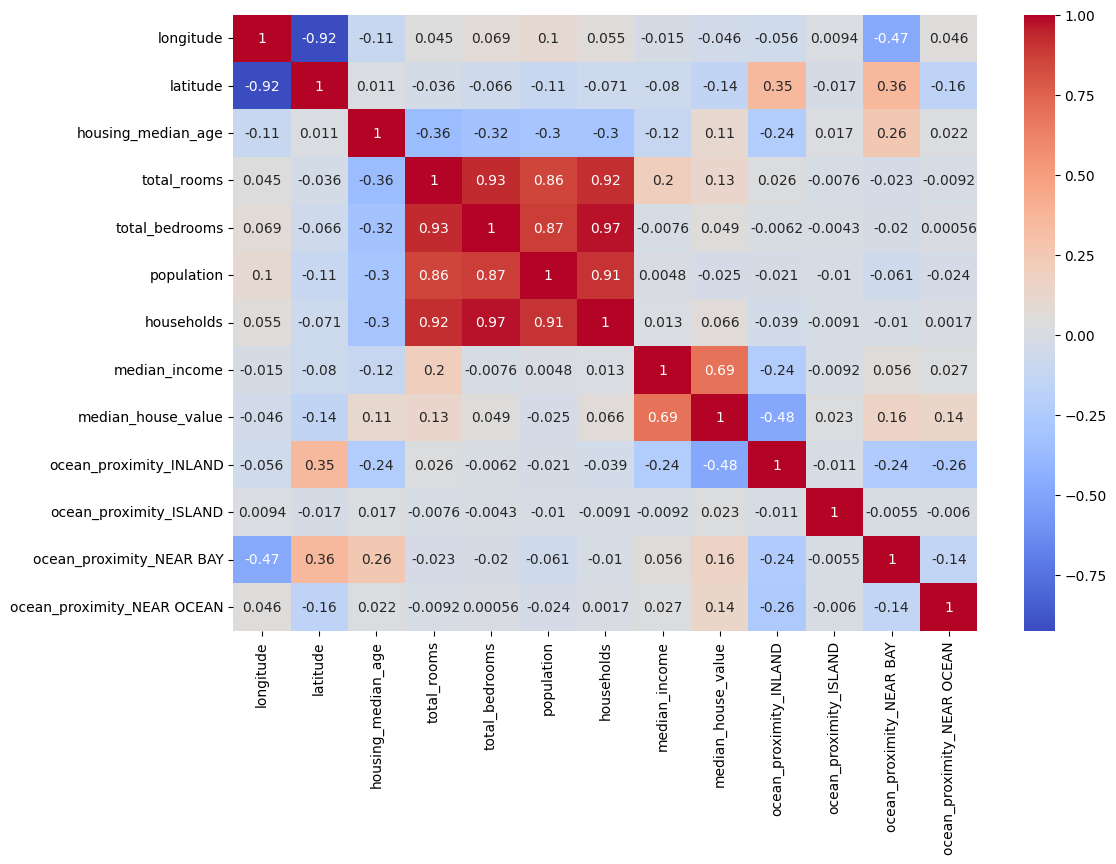

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [17]:
x = pd.to_numeric(df['total_rooms'], errors='coerce')

In [ ]:
x.info()

In [18]:
df['total_bedrooms'] = x

In [ ]:
df.info()

In [13]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [14]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Average Error (RMSE): $", rmse)

Average Error (RMSE): $ 70060.5218447351


In [18]:
print("Model Score (R2):", r2_score(y_test, predictions))

Model Score (R2): 0.6254240620553614


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train),
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test,rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_predictions))


In [21]:
print("------------------------------------------------")
print(f"Linear Regression R2: {r2_score(y_test, predictions):.3f}")
print(f"Random Forest R2:     {rf_r2:.3f}")
print("------------------------------------------------")
print(f"Error dropped by: ${int(rmse - rf_rmse)}")

------------------------------------------------
Linear Regression R2: 0.625
Random Forest R2:     0.816
------------------------------------------------
Error dropped by: $21022
